In [39]:

!pip install tensorflow tensorflow-gpu opencv-python matplotlib

In [1]:
import tensorflow as tf
import os

In [2]:
# Avoid OOM errors by setting GPU Memory Consumption Growth
gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus: 
    tf.config.experimental.set_memory_growth(gpu, True)

In [84]:
import cv2
import imghdr

In [85]:
data_dir = 'manrega data' 

In [86]:
os.listdir(data_dir)

['buildings', 'dams', 'ponds', 'roads']

In [87]:
image_exts = ['jpeg','jpg', 'bmp', 'png']

In [88]:
for image_class in os.listdir(data_dir): 
    for image in os.listdir(os.path.join(data_dir, image_class)):
        image_path = os.path.join(data_dir, image_class, image)
        try: 
            img = cv2.imread(image_path)
            tip = imghdr.what(image_path)
            if tip not in image_exts: 
                print('Image not in ext list {}'.format(image_path))
                os.remove(image_path)
        except Exception as e: 
            print('Issue with image {}'.format(image_path))
            # os.remove(image_path)

Image not in ext list manrega data\ponds\010d6ed5a8e7c704122a775663105a4bf6004253.jpg
Image not in ext list manrega data\ponds\359088-ponds.webp
Image not in ext list manrega data\ponds\359090-pond-water.webp
Image not in ext list manrega data\ponds\land-now-sits-a-rainfed-irrigation-pond-Photo-courtsy-of-C-Vinitha-1-770x411.jpg
Image not in ext list manrega data\ponds\Village-pond-image.webp
Image not in ext list manrega data\roads\31Road1.jpg
Image not in ext list manrega data\roads\930598-roads.webp
Image not in ext list manrega data\roads\Roads_relaid.jpg


In [89]:
tf.data.Dataset??

In [90]:
import numpy as np
from matplotlib import pyplot as plt

In [91]:
data = tf.keras.utils.image_dataset_from_directory('manrega data')
# this command is used for inferred labeling  

Found 376 files belonging to 4 classes.


In [92]:
data_iterator = data.as_numpy_iterator()

In [93]:
batch = data_iterator.next()

In [94]:
 batch[0].shape
 #images being represented as numpy array

(32, 256, 256, 3)

In [95]:
data_iterator

In [96]:
len(batch)
# length of the batch comes 2 as there are two parts of the batch one is images and other is labeels at indices 0 and 1 repectively

2

In [97]:
batch[1]

array([1, 2, 0, 1, 0, 2, 0, 0, 1, 2, 2, 0, 1, 1, 2, 2, 2, 0, 1, 0, 2, 3,
       3, 2, 1, 1, 1, 0, 2, 3, 0, 2])

In [98]:

data = data.map(lambda x,y: (x/255, y))

In [99]:
scalled_iterator=data.as_numpy_iterator()

In [100]:
batch=scalled_iterator.next()

In [101]:
batch[0].max()

1.0

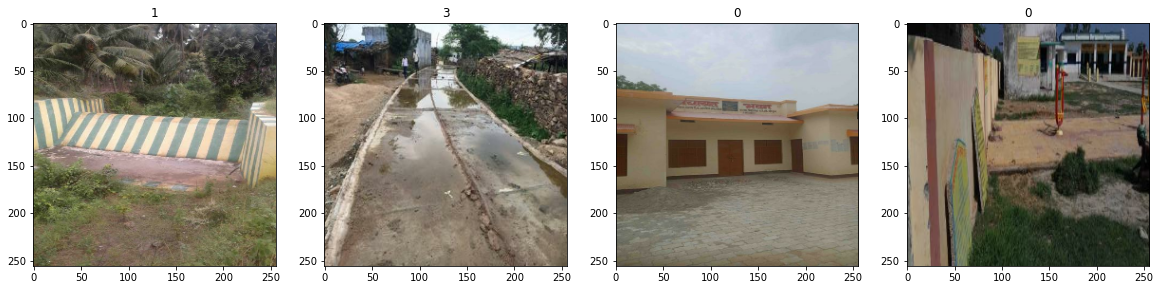

In [102]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img)
    ax[idx].title.set_text(batch[1][idx])

In [103]:
len(data)

12

In [104]:
train_size = int(len(data)*.7)+1
val_size = int(len(data)*.2)
test_size = int(len(data)*.1)+1

In [105]:
test_size+val_size+train_size

13

In [106]:
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size+val_size).take(test_size)

In [107]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten

In [108]:
# import numpy as np
# import pickle
# from os import listdir
# import os
# import tensorflow
# import cv2
# from sklearn.preprocessing import LabelBinarizer
# from tensorflow.keras.models import Sequential
# from tensorflow.keras.layers import BatchNormalization
# from tensorflow.keras.layers import Conv2D
# from tensorflow.keras.layers import MaxPooling2D
# from tensorflow.keras.layers import Activation, Flatten, Dropout, Dense
# from tensorflow.keras import backend as K
# from tensorflow.keras.preprocessing.image import ImageDataGenerator
# from tensorflow.keras.optimizers import Adam
# from tensorflow.keras.preprocessing import image
# from tensorflow.keras.preprocessing.image import img_to_array
# from sklearn.preprocessing import MultiLabelBinarizer
# from sklearn.model_selection import train_test_split
# import matplotlib.pyplot as plt

In [109]:
model = Sequential()

In [110]:
# model.add(Conv2D(32, (3, 3), padding="same",input_shape=(256, 256,3)))
# model.add(Activation("relu"))
# model.add(BatchNormalization(axis=chanDim))
# model.add(MaxPooling2D(pool_size=(3, 3)))
# model.add(Dropout(0.25))
# model.add(Conv2D(64, (3, 3), padding="same"))
# model.add(Activation("relu"))
# model.add(BatchNormalization(axis=chanDim))
# model.add(Conv2D(64, (3, 3), padding="same"))
# model.add(Activation("relu"))
# model.add(BatchNormalization(axis=chanDim))
# model.add(MaxPooling2D(pool_size=(2, 2)))
# model.add(Dropout(0.25))
# model.add(Conv2D(128, (3, 3), padding="same"))
# model.add(Activation("relu"))
# model.add(Conv2D(128, (3, 3), padding="same"))
# model.add(Activation("relu"))
# model.add(BatchNormalization(axis=chanDim))
# model.add(MaxPooling2D(pool_size=(2, 2)))
# model.add(Dropout(0.25))
# model.add(Flatten())
# model.add(Dense(1024))
# model.add(Activation("relu"))
# model.add(BatchNormalization())
# model.add(Dropout(0.5))
# model.add(Dense(n_classes))
# model.add(Activation("softmax"))

In [111]:
model.add(Conv2D(16, (3,3), 1, activation='relu', input_shape=(256,256,3)))
model.add(MaxPooling2D())
model.add(Conv2D(32, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Conv2D(16, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(4, activation='softmax'))

In [112]:
model.compile('adam', loss=tf.losses.SparseCategoricalCrossentropy(), metrics=['accuracy'])


In [113]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_7 (Conv2D)           (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 127, 127, 16)     0         
 2D)                                                             
                                                                 
 conv2d_8 (Conv2D)           (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 62, 62, 32)       0         
 2D)                                                             
                                                                 
 conv2d_9 (Conv2D)           (None, 60, 60, 16)        4624      
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 30, 30, 16)      

In [114]:
logdir='manrega logs'


In [115]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)


In [116]:
hist = model.fit(train, epochs=15, validation_data=val, callbacks=[tensorboard_callback])


Epoch 1/15
9/9 [==============================] - 12s 1s/step - loss: 1.4689 - accuracy: 0.2153 - val_loss: 1.3575 - val_accuracy: 0.4219
Epoch 2/15
9/9 [==============================] - 10s 1s/step - loss: 1.3567 - accuracy: 0.3542 - val_loss: 1.2583 - val_accuracy: 0.5156
Epoch 3/15
9/9 [==============================] - 10s 1s/step - loss: 1.2467 - accuracy: 0.4931 - val_loss: 1.2854 - val_accuracy: 0.4219
Epoch 4/15
9/9 [==============================] - 10s 1s/step - loss: 1.0747 - accuracy: 0.5208 - val_loss: 0.9173 - val_accuracy: 0.6250
Epoch 5/15
9/9 [==============================] - 10s 993ms/step - loss: 0.9242 - accuracy: 0.6771 - val_loss: 0.8493 - val_accuracy: 0.6094
Epoch 6/15
9/9 [==============================] - 9s 988ms/step - loss: 0.6811 - accuracy: 0.7812 - val_loss: 0.5645 - val_accuracy: 0.7969
Epoch 7/15
9/9 [==============================] - 9s 977ms/step - loss: 0.5547 - accuracy: 0.8333 - val_loss: 0.4096 - val_accuracy: 0.8438
Epoch 8/15
9/9 [===========

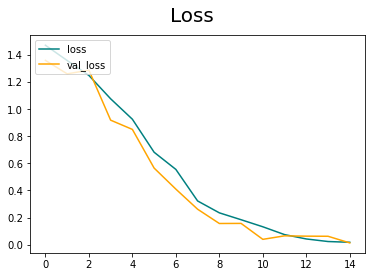

In [118]:
fig = plt.figure()
plt.plot(hist.history['loss'], color='teal', label='loss')
plt.plot(hist.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()


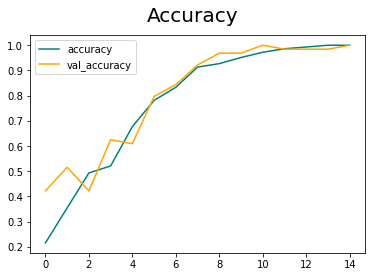

In [119]:
fig = plt.figure()
plt.plot(hist.history['accuracy'], color='teal', label='accuracy')
plt.plot(hist.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.show()

In [120]:
#Evaluate

In [121]:
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy


In [122]:
pre = Precision()
re = Recall()
acc = tf.keras.metrics.CategoricalAccuracy()



In [125]:
# for batch in test.as_numpy_iterator(): 
#     X, y = batch
#     yhat = model.predict([[[[X]]]])
#     pre.update_state(y, yhat)
#     re.update_state(y, yhat)
#     acc.update_state(y, yhat)


In [40]:
# print(f'Precision:{pre.result().numpy()},Recall:{re.result().numpy()} ,Accuracy:{ acc.result().numpy()}')


Precision:0.0,Recall:0.0 ,Accuracy:0.0


In [123]:
print(test.as_numpy_iterator())

In [145]:
#TEST

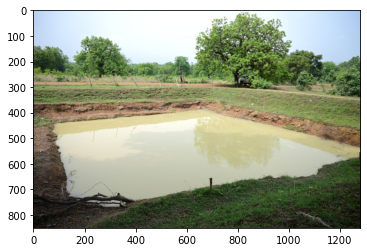

In [126]:
img = cv2.imread('pondTest.JPG')
plt.imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGB))
plt.show()

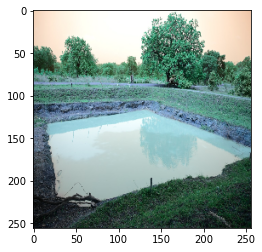

In [127]:
resize = tf.image.resize(img, (256,256))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [128]:
yhat = model.predict(np.expand_dims(resize/255, 0))


1/1 [==============================] - 0s 144ms/step


In [129]:
ans=yhat.argmax()
ans

2

In [130]:
if ans==0: 
    print(f'building')
elif ans==1:
    print(f'dam')
elif ans==2:
    print(f'ponds')    
else:
    print(f'roads')


ponds


In [131]:
from tensorflow.keras.models import load_model

In [132]:
model.save(os.path.join('models','imageclassifier.h5'))


In [133]:
new_model = load_model(os.path.join('models','imageclassifier.h5'))

In [134]:
new_model.predict(np.expand_dims(resize/255, 0))

1/1 [==============================] - 0s 140ms/step


array([[1.3547315e-08, 6.1654078e-05, 9.9993837e-01, 1.2781551e-08]],
      dtype=float32)